In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__

'2.0.0'

shape of Y: (162,)


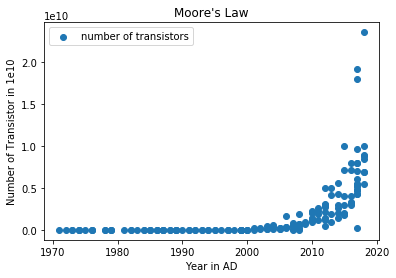

In [3]:
# Load in the data into Pandas Dataframe
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1) # make it 2-D array of size m x n where n=1
Y = data[:, 1]
print(f'shape of Y: {Y.shape}') # Leave it as 1-D array
# Plot the data - it is expontential
plt.scatter(X, Y, label="number of transistors")
plt.title("Moore's Law")
plt.xlabel("Year in AD")
plt.ylabel("Number of Transistor in 1e10")
plt.legend()
plt.show()

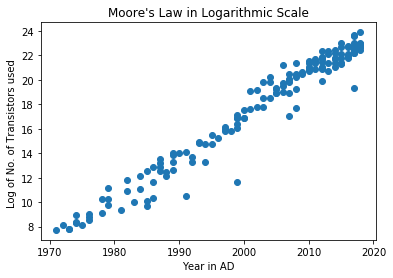

In [4]:
# Since we want a linear model, so Lets' ake the LOG
Y = np.log(Y)
plt.scatter(X, Y)
plt.xlabel("Year in AD")
plt.ylabel("Log of No. of Transistors used ")
plt.title("Moore's Law in Logarithmic Scale")
plt.show()

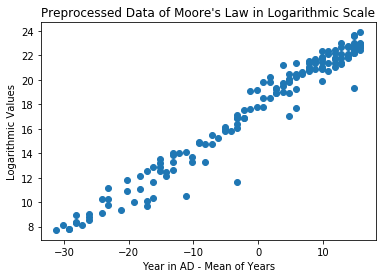

In [5]:
# Lets also center the X data so the values are not too large
# we could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()
plt.scatter(X, Y)
plt.title("Preprocessed Data of Moore's Law in Logarithmic Scale")
plt.xlabel("Year in AD - Mean of Years")
plt.ylabel("Logarithmic Values")
plt.show()

In [6]:
# Now create our Model
m, n = X.shape
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
              loss='mse')

# Learning rate scheduler
def schedule_lr(epoch, lr):
    if epoch >=50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule_lr)

# Train the model
results = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 5ms/sample - loss: 504.5938
Epoch 2/200
162/162 [==============================] - 0s 139us/sample - loss: 412.0265
Epoch 3/200
162/162 [==============================] - 0s 183us/sample - loss: 438.1289
Epoch 4/200
162/162 [==============================] - 0s 108us/sample - loss: 263.0591
Epoch 5/200
162/162 [==============================] - 0s 163us/sample - loss: 206.3893
Epoch 6/200
162/162 [==============================] - 0s 135us/sample - loss: 123.7262
Epoch 7/200
162/162 [==============================] - 0s 120us/sample - loss: 77.4326
Epoch 8/200
162/162 [==============================] - 0s 157us/sample - loss: 59.4579
Epoch 9/200
162/162 [==============================] - 0s 184us/sample - loss: 43.5784
Epoch 10/200
162/162 [==============================] - 0s 215us/sample - loss: 31.0194
Epoch 11/200
162/162 [==============================] - 0s 222us/sample - loss: 23.0968
Epoch 12/200
162

162/162 [==============================] - 0s 133us/sample - loss: 0.8714
Epoch 188/200
162/162 [==============================] - 0s 135us/sample - loss: 0.8706
Epoch 189/200
162/162 [==============================] - 0s 191us/sample - loss: 0.8739
Epoch 190/200
162/162 [==============================] - 0s 148us/sample - loss: 0.8715
Epoch 191/200
162/162 [==============================] - 0s 158us/sample - loss: 0.8707
Epoch 192/200
162/162 [==============================] - 0s 163us/sample - loss: 0.8731
Epoch 193/200
162/162 [==============================] - 0s 172us/sample - loss: 0.8708
Epoch 194/200
162/162 [==============================] - 0s 129us/sample - loss: 0.8721
Epoch 195/200
162/162 [==============================] - 0s 158us/sample - loss: 0.8712
Epoch 196/200
162/162 [==============================] - 0s 165us/sample - loss: 0.8705
Epoch 197/200
162/162 [==============================] - 0s 125us/sample - loss: 0.8701
Epoch 198/200
162/162 [=======================

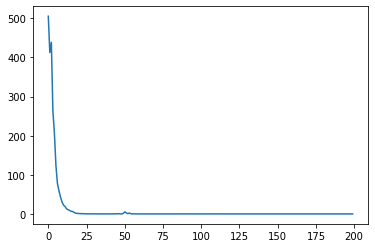

In [7]:
# plot the loss
plt.plot(results.history['loss'], label='Loss')

In [8]:
# Get the sloe of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34210196]], dtype=float32), array([17.768446], dtype=float32)]


In [9]:
# The slope of the line is:
m = model.layers[0].get_weights()[0][0,0]

In [10]:
print(f"The slope is: {m:.3f}")

The slope is: 0.342


Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.339 $$

so that:

$$ r = e^{0.339} = 1.40354 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [11]:
print("Time to double: {:.3f} years".format(np.log(2)/m))

Time to double: 2.026 years


In [12]:
# Analytical Solutions
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)
print("Time to double: ", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


# Making Predictions


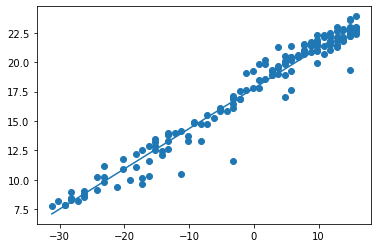

In [14]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [15]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True